In [28]:
import numpy as np

def fractional_delay(tau, N):
    #tau = 0.3  # Fractional delay [samples].
    #N = 21     # Filter length.
    n = np.arange(N)

    # Compute sinc filter.
    h = np.sinc(n - (N - 1) / 2 - tau)

    # Multiply sinc filter by window
    h *= np.blackman(N)

    # Normalize to get unity gain.
    h /= np.sum(h)
    
    return h

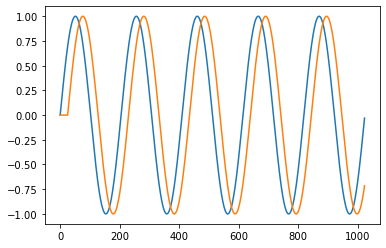

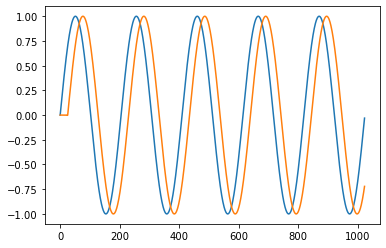

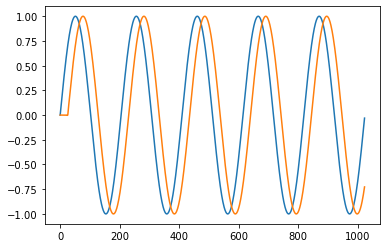

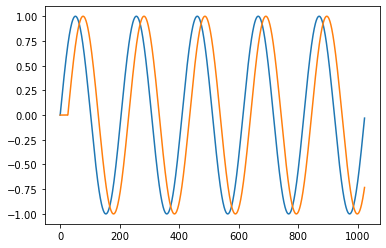

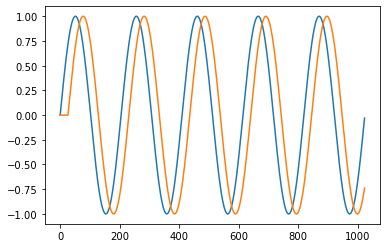

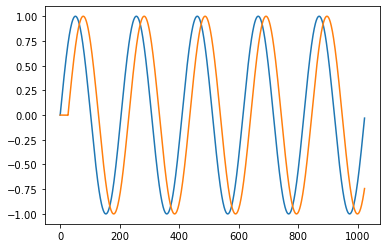

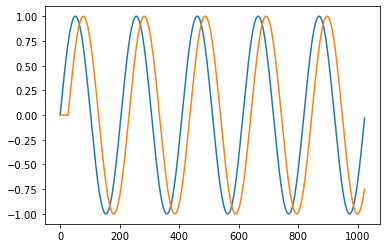

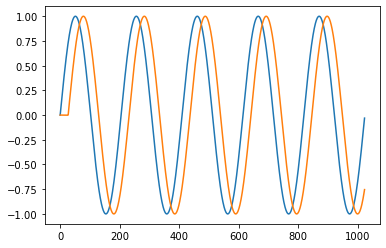

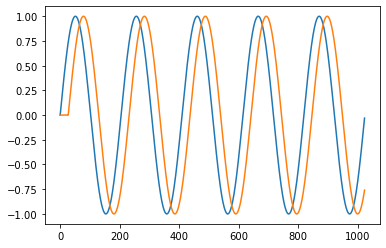

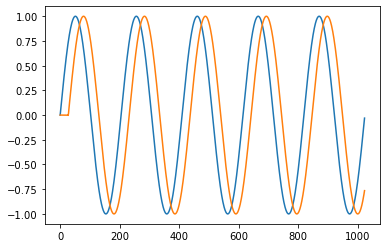

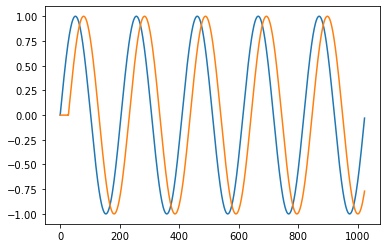

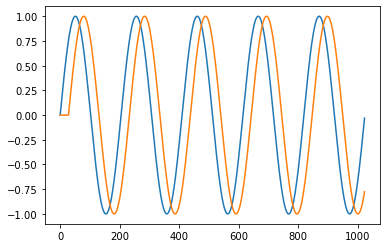

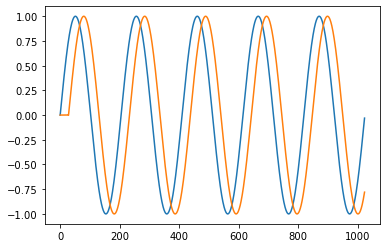

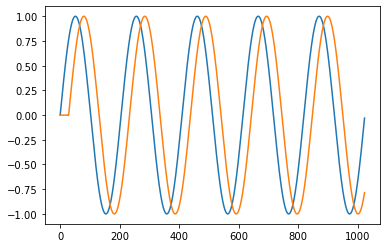

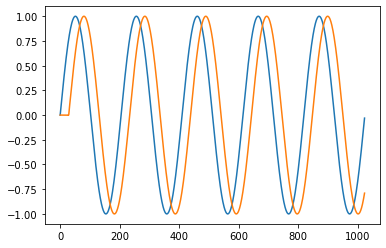

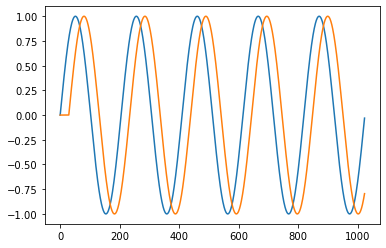

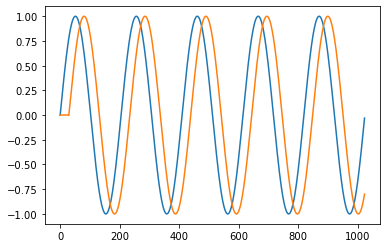

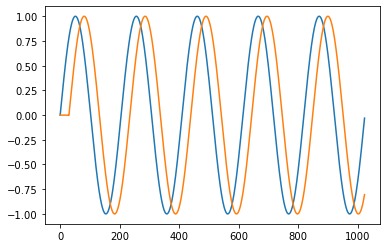

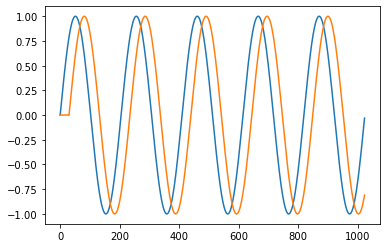

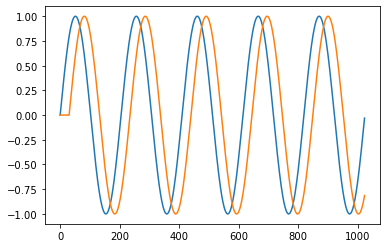

In [62]:
from scipy import signal
import matplotlib.pyplot as plt

T = 1024
x = np.sin(2*np.pi*np.arange(T)/T*5) #+ np.random.normal(0,0.1,T)
figNo = 1

diffs = []

for delay in np.linspace(0,50,20)/10:
    h = fractional_delay(delay,51)
    x_delayed = signal.lfilter(h, 1, x)
    plt.figure(figNo)
    figNo = figNo + 1
    plt.plot(x)
    plt.plot(x_delayed)# from scipy.signal import butter,filtfilt
    
    diffs.append([np.sum(np.abs(x-x_delayed)),np.sum(np.abs(np.abs(np.fft.fft(x))-np.abs(np.fft.fft(x_delayed))))])


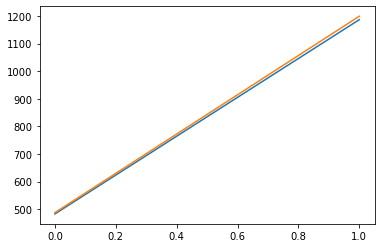

In [64]:
plt.plot(diffs[1])
plt.plot(diffs[2])